<a href="https://colab.research.google.com/github/rajvirvyas/bootcamp-project-2022/blob/main/Copy_of_DATA_301_Lab_1A_Rajvir_Vyas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

**ENTER YOUR WRITTEN EXPLANATION HERE.**

1.Based on the video we watched about Benford's law, the percentage of values that have a first digit of 1 is roughly 30% and the percentage of values that have a first digit of 9 is roughly 4.6%. It is calculated by this formula, P{d}= ln(1+1/d)/ln(10) ; where d is the first digit from 1 to 9.

2.Based on my knowledge, I don't think there is a specific law like Benford's law that descibes last-digit behavior, but I will say that I think that each num will occur in the dataset with equal chances, as the trends become more uniform as we progress to the last digit. So perhaps the percentage of values having 1 as the last digit is roughly 10% and the percent of values having 9 as the last digit is also roughly 10%.

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://dlsun.github.io/pods/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [ ]:
# ENTER YOUR CODE HERE.
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_SP500 = pd.read_csv(data_dir + "sp500.csv")
df_SP500.set_index(["date", "Name"], inplace=True)
df_SP500

# I am not sure about the unit of observation. On the specific day of 2018-02-01 (I'm not certain if this is American or Worldwide format), it is tracking the price of the shares at the start and end, so I think that may be our unit of observation. 

open    close    volume
date       Name                            
2018-02-01 AAL    $54.00   $53.88   3623078
           AAPL  $167.16  $167.78  47230787
           AAP   $116.24  $117.29    760629
           ABBV  $112.24  $116.34   9943452
           ABC    $97.74   $99.29   2786798
...                  ...      ...       ...
           XYL    $72.50   $74.84   1817612
           YUM    $84.24   $83.98   1685275
           ZBH   $126.35  $128.19   1756300
           ZION   $53.79   $54.98   3542047
           ZTS    $76.84   $77.82   2982259

[505 rows x 3 columns]

**ENTER YOUR WRITTEN EXPLANATION HERE.**

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

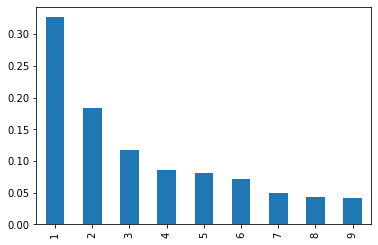

In [36]:
# ENTER YOUR CODE HERE.
df_SP500["volume"] = df_SP500.volume.astype(str)
df_SP500.drop(['vol_cat', 'vol'], axis=1) #had to delete unnecessary columns
df_SP500['vol_firstnum'] = df_SP500['volume'].str[0] #extracting first character
num_probs = df_SP500["vol_firstnum"].value_counts(normalize=True)
num_probs.sort_index()
num_probs.plot.bar()

#The results match what I predicted in Q0, which makes sense as it is following Benford's law (and there is no apparent fraud happening).


**ENTER YOUR WRITTEN EXPLANATION HERE.**

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

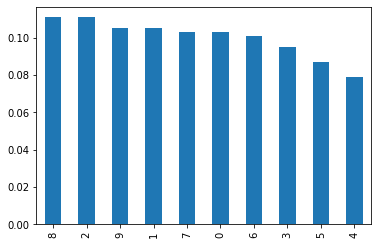

In [41]:
# ENTER YOUR CODE HERE.
df_SP500['vol_lastnum'] = df_SP500['volume'].str[-1] #extracting last character
num_probs2 = df_SP500["vol_lastnum"].value_counts(normalize=True)
num_probs2.sort_index()
num_probs2.plot.bar()

#It is kind of accurate to what I said about the results being more "uniform" as most frequencies are 10% roughly, but some outliers do exist.

**ENTER YOUR WRITTEN EXPLANATION HERE.**

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

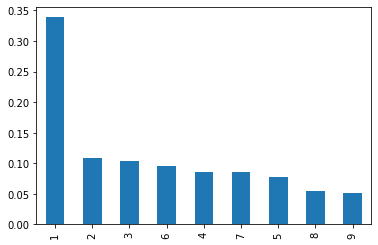

In [59]:
# ENTER YOUR CODE HERE.
#to convert from str to float, we will need to remove $
# df_SP500['close'] = df_SP500['close'].str.replace(r'$', '')  #these have already applied
# df_SP500['close'] = df_SP500['close'].str.replace(r',', '')
df_SP500["close"] = df_SP500.close.astype(str)
# df_SP500["close"].dtype

#now, we can proceed with getting first char
df_SP500['close_firstnum'] = df_SP500['close'].str[0] #extracting first character
num_probs3 = df_SP500["close_firstnum"].value_counts(normalize=True)
num_probs3.sort_index()
num_probs3.plot.bar()

#This is a similar trend to what we saw for the volume, i.e. 1 is most likely then 2, then 3... which makes sense as Benford's law is still holding true.



**ENTER YOUR WRITTEN EXPLANATION HERE.**